# AlexNet

In [1]:
%tensorflow_version 1.x
!pip install tflearn

TensorFlow 1.x selected.


Using TensorFlow backend.








Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 384)       1327488   
________________________________

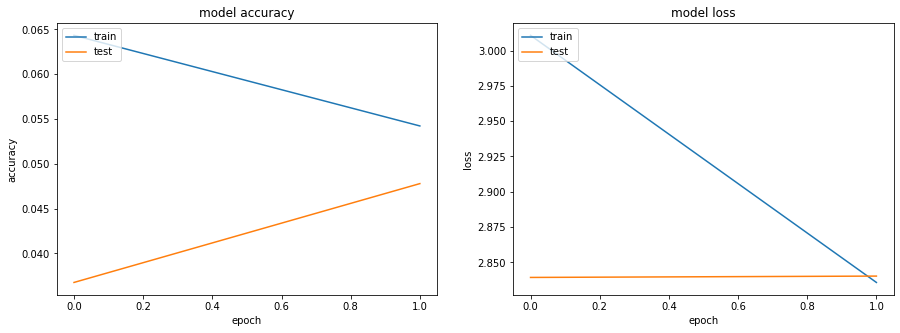

In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam

# Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split
x, y = oxflower17.load_data(one_hot=True)

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)
#已經normalize過
#print(X_train[0])


# Data augumentation with Keras tools
from keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

'''
img_gen = ImageDataGenerator(
    rescale=1./255
    )
'''
# Build AlexNet model
def AlexNet(width, height, depth, classes):
    
    model = Sequential()
    
    #First Convolution and Pooling layer
    model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(width,height,depth),padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Second Convolution and Pooling layer
    model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Three Convolution layer and Pooling Layer
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Fully connection layer
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.5))
    
    #Classfication layer
    model.add(Dense(classes,activation='softmax'))

    return model
  
AlexNet_model = AlexNet(224,224,3,17)
AlexNet_model.summary()
AlexNet_model.compile(optimizer=Adam(),loss = 'categorical_crossentropy',metrics=['accuracy'])

# Start training using dataaugumentation generator
History = AlexNet_model.fit_generator(img_gen.flow(X_train, y_train, batch_size = 16),
                                      steps_per_epoch = len(X_train)/16, validation_data = (X_test,y_test), epochs = 2 )


#Plot Loss and Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

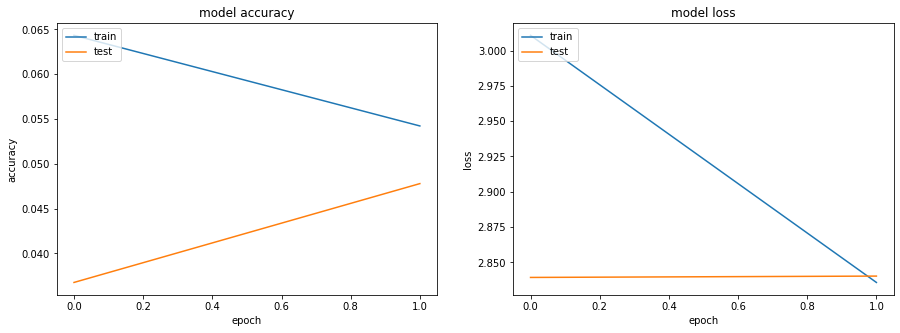

In [3]:
#Plot Loss and Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()